# Proyek Machine Learning Terapan: Prediksi Churn Pelanggan
- **Nama:** Danny Budiman
- **Email:** danny.budiman@gmail.com
- **ID Dicoding:** danny.budiman@gmail.com

# Domain Proyek
## Latar Belakang

Dalam industri telekomunikasi, mempertahankan pelanggan lebih murah daripada mendapatkan pelanggan baru. Salah satu tantangan utama adalah **churn**, yaitu kondisi ketika pelanggan berhenti berlangganan layanan. Menurut [Harvard Business Review](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), meningkatkan retensi pelanggan sebesar 5% dapat meningkatkan profit hingga 25–95%.

Dengan memanfaatkan data historis pelanggan seperti jenis kontrak, lama berlangganan, dan tagihan bulanan, perusahaan dapat membangun sistem prediksi churn untuk mengidentifikasi pelanggan yang berisiko tinggi dan melakukan intervensi lebih awal.



# Business Understanding

**Problem Statement**

Bagaimana perusahaan dapat mengidentifikasi pelanggan yang berpotensi melakukan churn berdasarkan atribut layanan dan demografi, agar dapat merancang strategi retensi yang lebih efektif?

**Goals**

- Mengembangkan model klasifikasi berbasis Machine Learning yang mampu mengidentifikasi pelanggan dengan potensi churn tinggi.
- Menyediakan analisis fitur yang berkontribusi paling besar terhadap keputusan churn pelanggan sebagai dasar pengambilan keputusan bisnis.
- Meningkatkan nilai f1-score pada kelas "churn" agar perusahaan dapat meminimalkan false negative dalam proses retensi pelanggan.

**Solution Statement**

Untuk mencapai tujuan tersebut, proyek ini menyusun dua pendekatan solusi:

1. **Baseline Modeling**: Logistic Regression dan Random Forest sebagai pembanding awal.
2. **Improved Modeling**: XGBoost dengan teknik:
   - Hyperparameter tuning menggunakan GridSearchCV
   - Penanganan imbalance menggunakan SMOTE dan `scale_pos_weight`
   - Feature selection dengan SelectFromModel
   - Threshold tuning untuk optimasi recall dan f1-score

Model dievaluasi dengan metrik yang sesuai untuk data imbalance, yaitu f1-score dan recall, khususnya pada kelas minoritas.

## Data Understanding

Tahapan ini bertujuan untuk memahami struktur, isi, dan karakteristik dari dataset yang digunakan. Meliputi jumlah baris dan kolom, kondisi data (missing value, duplikat, outlier), serta uraian fitur.

Langkah ini penting agar data bersih dan siap digunakan oleh model pembelajaran mesin. Teknik seperti SMOTE juga digunakan untuk mengatasi imbalance pada kelas target.


## Data Understanding

## Sumber Dataset

- [Telco Customer Churn Dataset – Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)

**Informasi Dataset:**

- Jumlah baris: 7043
- Jumlah kolom: 21 fitur + 1 target (`Churn`)
- Format: CSV
- Target: `Churn` (Yes/No)

## Import Library

## 📦 Import Library
Mengimpor pustaka Python yang dibutuhkan untuk tahapan analisis data, preprocessing, pemodelan, dan evaluasi.  
- `numpy`, `pandas` untuk manipulasi data  
- `matplotlib`, `seaborn` untuk visualisasi  
- `sklearn`, `xgboost` untuk modeling dan metrik evaluasi


## 📁 Load Dataset
Memuat dataset pelanggan dari file CSV ke dalam DataFrame pandas agar dapat dilakukan eksplorasi dan analisis lebih lanjut.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# URL mentah (raw) dari file CSV di GitHub
url = "https://raw.githubusercontent.com/dannybudiman/Proyek-Predictive-Analytics/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Membaca dataset
df = pd.read_csv(url)

# Menampilkan struktur awal
print("🔹 Shape:", df.shape)
print("🔹 Kolom:", df.columns.tolist())
df.info()
df.head()


🔹 Shape: (7043, 21)
🔹 Kolom: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

## 👀 Exploratory Data Analysis
Mengevaluasi struktur dataset untuk memahami jenis fitur, nilai target, dan preview isi data.  
Langkah awal ini membantu memetakan strategi preprocessing dan modeling yang akan digunakan.


## Informasi Dataset:**

- Jumlah baris: 7043
- Jumlah kolom: 21 fitur + 1 target (`Churn`)
- Format: CSV
- Target: `Churn` (Yes/No)

**Kondisi Data:**

- Terdapat missing value pada kolom `TotalCharges`
- Tidak ditemukan duplikat berdasarkan `customerID`
- Outlier terdeteksi pada `MonthlyCharges` dan `tenure` melalui boxplot

**Uraian Fitur:**

| Fitur             | Deskripsi                                                                 |
|-------------------|---------------------------------------------------------------------------|
| customerID        | ID unik pelanggan                                                         |
| gender            | Jenis kelamin                                                             |
| SeniorCitizen     | Status lansia (0 = tidak, 1 = ya)                                         |
| Partner           | Memiliki pasangan                                                         |
| Dependents        | Memiliki tanggungan                                                       |
| tenure            | Lama berlangganan (bulan)                                                 |
| PhoneService      | Menggunakan layanan telepon                                               |
| MultipleLines     | Menggunakan lebih dari satu jalur telepon                                 |
| InternetService   | Jenis layanan internet                                                    |
| OnlineSecurity    | Layanan keamanan online                                                   |
| OnlineBackup      | Layanan backup online                                                     |
| DeviceProtection  | Proteksi perangkat                                                        |
| TechSupport       | Dukungan teknis                                                           |
| StreamingTV       | Layanan streaming TV                                                      |
| StreamingMovies   | Layanan streaming film                                                    |
| Contract          | Jenis kontrak (Bulanan, 1 tahun, 2 tahun)                                |
| PaperlessBilling  | Tagihan tanpa kertas                                                      |
| PaymentMethod     | Metode pembayaran                                                         |
| MonthlyCharges    | Biaya bulanan                                                             |
| TotalCharges      | Total biaya selama berlangganan                                           |
| Churn             | Target (Yes = churn, No = tidak churn)                                    |


## Data Preparation

**Langkah-langkah yang dilakukan:**

1. **Handling Missing Values**: Imputasi nilai kosong pada `TotalCharges` menggunakan median.
2. **One-Hot Encoding**: Mengubah fitur kategorikal menjadi numerik agar kompatibel dengan algoritma ML.
3. **Feature Alignment**: Menyamakan fitur antara train dan test set setelah encoding.
4. **Label Encoding**: Mengubah target `Churn` menjadi 0 (No) dan 1 (Yes).
5. **Scaling**: Normalisasi fitur numerik menggunakan `StandardScaler`.
6. **SMOTE**: Oversampling kelas minoritas untuk mengatasi imbalance.
7. **Feature Selection**: Menggunakan XGBoost untuk memilih fitur penting dan mengurangi noise.

**Alasan:**

- SMOTE dan `scale_pos_weight` digunakan karena distribusi label sangat tidak seimbang.
- Feature selection membantu meningkatkan performa dan efisiensi model.
- Threshold tuning digunakan untuk meningkatkan recall pada kelas “Yes”.

## 📑 Statistik Fitur dan Penyesuaian Format Numerik

Menampilkan statistik deskriptif terhadap seluruh fitur dalam dataset, baik numerik maupun kategorikal, menggunakan `df.describe(include='all')`. Ini membantu memetakan distribusi nilai, frekuensi kategori, serta mendeteksi potensi nilai anomali.

Selanjutnya, dilakukan konversi fitur `TotalCharges` menjadi tipe numerik untuk keperluan analisis dan modeling. Karena data ini memiliki nilai kosong yang tidak bisa dikonversi langsung, digunakan parameter `errors='coerce'` untuk mengganti nilai tidak valid menjadi `NaN`.

Langkah terakhir dalam cell ini adalah menghapus baris yang memiliki nilai kosong di `TotalCharges`, guna menghindari error saat proses kalkulasi statistik atau training model di tahap selanjutnya.


In [2]:
# Statistik numerik dan kategorikal
df.describe(include='all')

import numpy as np

# Suppress warning untuk operasi numerik
np.seterr(invalid='ignore')

# Drop atau isi nilai NaN yang menyebabkan operasi error
# Pastikan TotalCharges sudah dalam format numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Tangani nilai NaN
df.dropna(subset=['TotalCharges'], inplace=True)

# Cek Missing Values & Duplikasi
# Cek nilai hilang
df.isnull().sum()

# Cek duplikat
df.duplicated().sum()


In [3]:
# Cek Missing Values & Duplikasi
# Cek nilai hilang
df.isnull().sum()

# Cek duplikat
df.duplicated().sum()


0

## 📌 Pemeriksaan Kolom Spesifik yang Bermasalah: `TotalCharges`

Fitur `TotalCharges` sering mengalami kendala karena nilai yang tidak dapat langsung dikonversi ke numerik. Hal ini biasanya disebabkan oleh entri kosong atau karakter non-angka.

Langkah berikut digunakan untuk menangani hal tersebut:

- Mengonversi kolom `TotalCharges` ke tipe data numerik menggunakan `pd.to_numeric()` dengan `errors='coerce'`, sehingga nilai yang gagal dikonversi otomatis diubah menjadi `NaN`.
- Menampilkan jumlah nilai kosong (`NaN`) setelah konversi untuk mengetahui berapa banyak data yang perlu ditangani pada tahap pembersihan selanjutnya.

Hasil dari proses ini akan menjadi acuan untuk keputusan apakah baris-baris tersebut dihapus atau dikenakan imputasi.


In [4]:
# Cek Kolom Spesifik yang Sering Bermasalah
# Contoh: TotalCharges kadang ada NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Missing pada TotalCharges:", df['TotalCharges'].isnull().sum())


Missing pada TotalCharges: 0


## 📉 Distribusi Target
Menampilkan proporsi kelas target `Churn` (`Yes` dan `No`).  
Distribusi yang tidak seimbang mengindikasikan perlunya teknik penanganan imbalance seperti SMOTE.


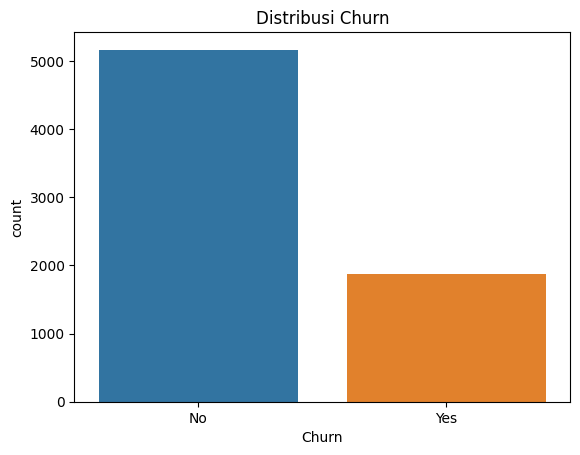

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [5]:
# Distribusi Target (Churn)
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi churn
sns.countplot(x='Churn', data=df)
plt.title("Distribusi Churn")
plt.show()

# Persentase churn
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


## 📊 Korelasi Fitur Numerik
Menampilkan heatmap korelasi untuk fitur numerik guna memahami hubungan antar atribut.  
Korelasi yang signifikan dapat menjadi pertimbangan dalam feature selection.


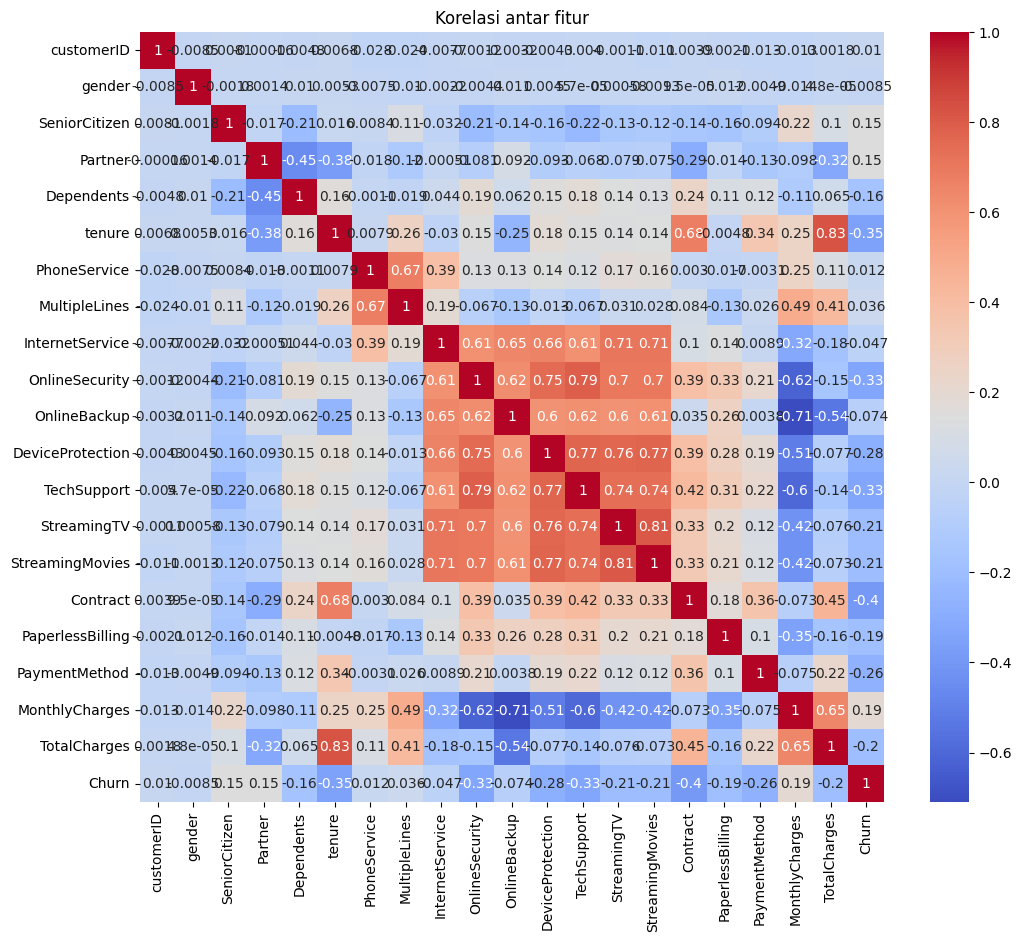

In [6]:
# ⚙️ Preprocessing Awal: Konversi TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# 🔎 Konversi Kolom Numerik Kategorikal ke Tipe Object
kolom_kategorikal_numerik = ['SeniorCitizen', 'Partner', 'Dependents', 
                             'PhoneService', 'PaperlessBilling', 'Churn']
for col in kolom_kategorikal_numerik:
    df[col] = df[col].astype('object')

# 📊 Encoding Fitur Kategorikal untuk Korelasi
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

# 🔥 Korelasi Antar Fitur Numerik
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur")
plt.show()



In [7]:
# Identifikasi Kolom Kategorikal Numerik
# Konversi semua kolom numerik kategorikal ke tipe 'object'
kategori_numerik = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in kategori_numerik:
    df[col] = df[col].astype('object')

for col in kategori_numerik:
    df[col] = df[col].astype('category')


## Label Encoding dan One-Hot Encoding

## 🧾 Ringkasan Transformasi Fitur Kategorikal

Berikut adalah tabel ringkas yang menunjukkan bagaimana fitur kategorikal diubah melalui proses encoding:

| Fitur Asli           | Jenis Encoding       | Fitur Hasil Transformasi                      |
|----------------------|----------------------|-----------------------------------------------|
| Churn                | Label Encoding       | `Churn` (0 = No, 1 = Yes)                     |
| PaperlessBilling     | Label Encoding       | `PaperlessBilling` (0 = No, 1 = Yes)          |
| Partner              | Label Encoding       | `Partner` (0 = No, 1 = Yes)                   |
| PhoneService         | Label Encoding       | `PhoneService` (0 = No, 1 = Yes)              |
| Contract             | One-Hot Encoding     | `Contract_One year`, `Contract_Two year`      |
| PaymentMethod        | One-Hot Encoding     | `PaymentMethod_*`                             |
| InternetService      | One-Hot Encoding     | `InternetService_Fiber optic`, `InternetService_No` |
| StreamingTV          | One-Hot Encoding     | `StreamingTV_*`                               |
| StreamingMovies      | One-Hot Encoding     | `StreamingMovies_*`                           |
| OnlineSecurity       | One-Hot Encoding     | `OnlineSecurity_*`                            |
| OnlineBackup         | One-Hot Encoding     | `OnlineBackup_*`                              |
| TechSupport          | One-Hot Encoding     | `TechSupport_*`                               |
| MultipleLines        | One-Hot Encoding     | `MultipleLines_*`                             |
| DeviceProtection     | One-Hot Encoding     | `DeviceProtection_*`                          |
| gender               | One-Hot Encoding     | `gender_Male`                                 |
| SeniorCitizen        | Sudah numerik        | `SeniorCitizen`                               |
| Dependents           | One-Hot Encoding     | `Dependents_Yes`                              |

📌 *Catatan:* Kolom hasil One-Hot Encoding menggunakan konvensi `drop_first=True`, sehingga kategori pertama pada tiap fitur tidak ditampilkan dan menjadi referensi default.

Hasil encoding disimpan ke dalam DataFrame `df_encoded`, yang akan digunakan pada tahap modeling dan evaluasi.


In [8]:
# Label Encoding untuk biner
le = LabelEncoder()
binary_cols = ['Churn', 'PaperlessBilling', 'Partner', 'PhoneService']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding untuk sisanya
df_encoded = pd.get_dummies(df, drop_first=True)


# Univariate Analysis EDA

## 📊 Distribusi Lama Berlangganan (Tenure)

Visualisasi ini bertujuan untuk memahami sebaran lama berlangganan pelanggan (fitur `tenure`).  
Dengan menggunakan histogram dan kurva KDE (Kernel Density Estimation), kita dapat:

- Mengidentifikasi apakah pelanggan cenderung berlangganan dalam jangka pendek, menengah, atau panjang.
- Mengenali pola distribusi yang bisa berkorelasi dengan kemungkinan churn.

📌 Observasi ini berguna untuk:
- Menyusun strategi retensi berdasarkan segmentasi pelanggan
- Menentukan apakah `tenure` layak menjadi fitur penting dalam prediksi churn

Kurva KDE memberikan gambaran halus dari distribusi, sementara histogram menunjukkan frekuensi aktual pelanggan pada rentang bulan tertentu.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


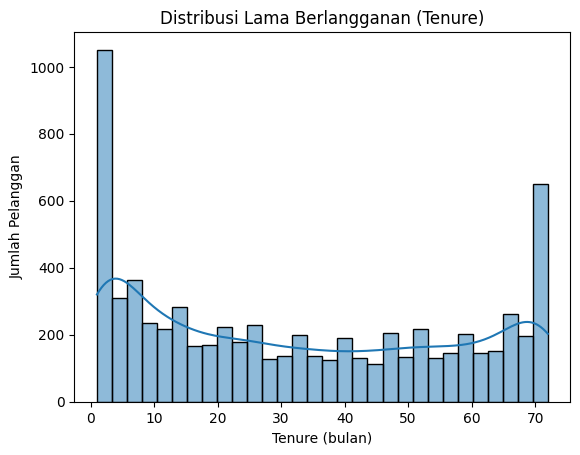

In [9]:
# 1. Distribusi Lama Berlangganan (tenure)
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Distribusi Lama Berlangganan (Tenure)")
plt.xlabel("Tenure (bulan)")
plt.ylabel("Jumlah Pelanggan")
plt.show()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## 💰 Distribusi Total Biaya Berlangganan (TotalCharges)

Visualisasi ini menunjukkan sebaran nilai total biaya yang telah dibayarkan oleh pelanggan selama masa berlangganan (`TotalCharges`). Dengan histogram dan kurva KDE (Kernel Density Estimation), kita dapat:

- Melihat apakah biaya total pelanggan cenderung terpusat pada rentang tertentu atau menyebar luas.
- Mengidentifikasi apakah ada pola non-normal seperti skew (condong) yang dapat memengaruhi distribusi kelas churn.
- Mengenali potensi outlier di sisi pelanggan dengan durasi langganan sangat panjang atau tagihan tinggi.

📌 Insight dari distribusi ini dapat membantu dalam:
- Menentukan apakah perlu dilakukan scaling atau transformasi untuk meningkatkan kinerja model.
- Memahami korelasi antara pengeluaran pelanggan dan kemungkinan churn.

Visualisasi ini menggunakan warna oranye agar kontras dengan visual sebelumnya dan membantu membedakan antar fitur.


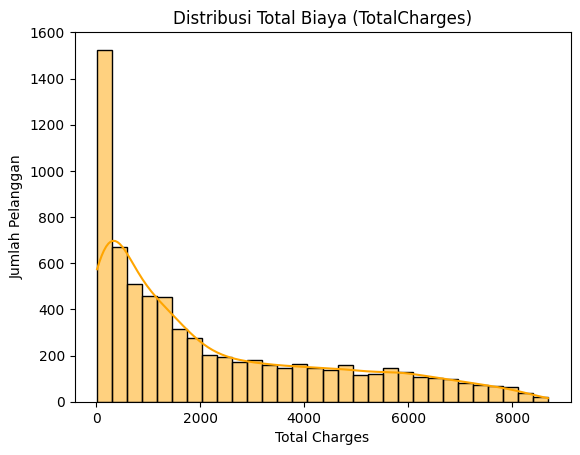

In [10]:
# 2. Distribusi Total Biaya (TotalCharges)
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='orange')
plt.title("Distribusi Total Biaya (TotalCharges)")
plt.xlabel("Total Charges")
plt.ylabel("Jumlah Pelanggan")
plt.show()


## 👥 Distribusi Gender Pelanggan

Visualisasi ini menunjukkan proporsi pelanggan berdasarkan fitur kategorikal `gender`. Dengan menggunakan `countplot`, kita dapat melihat:

- Perbandingan jumlah pelanggan antara kategori `Male` dan `Female`
- Mengidentifikasi apakah terdapat dominasi satu kelompok gender yang mungkin relevan terhadap pola churn

📌 Meskipun fitur `gender` secara statistik mungkin tidak memiliki korelasi langsung yang kuat terhadap churn, pemahaman distribusinya penting sebagai bagian dari eksplorasi fitur demografi.

Langkah ini termasuk dalam analisis univariat fitur kategorikal, yang bertujuan menilai karakteristik masing-masing atribut secara individual.


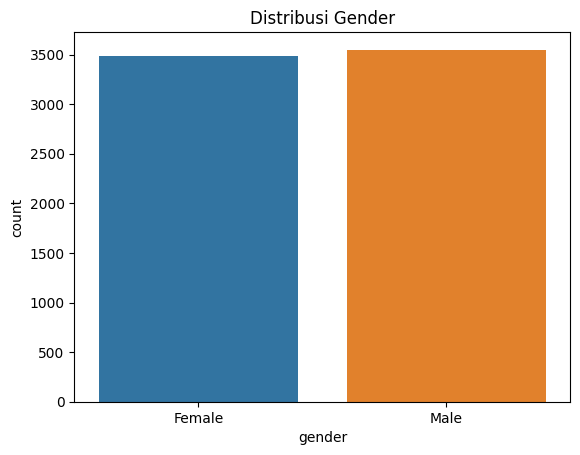

In [11]:
# 📊 Univariate Analysis: Fitur Kategorikal
# 3. Proporsi Gender
sns.countplot(x='gender', data=df)
plt.title("Distribusi Gender")
plt.show()


## 📄 Distribusi Jenis Kontrak Pelanggan

Visualisasi ini menunjukkan proporsi pelanggan berdasarkan fitur `Contract`, yang mencerminkan jenis kontrak layanan yang mereka pilih:  
- **Month-to-month**  
- **One year**  
- **Two year**

Melalui `countplot`, kita dapat melihat seberapa banyak pelanggan berlangganan pada masing-masing jenis kontrak.

📌 Insight dari distribusi ini:
- Pelanggan dengan kontrak jangka pendek (bulanan) biasanya lebih fleksibel dan berpotensi memiliki risiko churn yang lebih tinggi.
- Kontrak jangka panjang cenderung mengindikasikan komitmen lebih besar terhadap layanan dan mungkin memiliki korelasi negatif terhadap churn.

Analisis ini sangat relevan dalam menentukan strategi retensi dan target intervensi perusahaan.


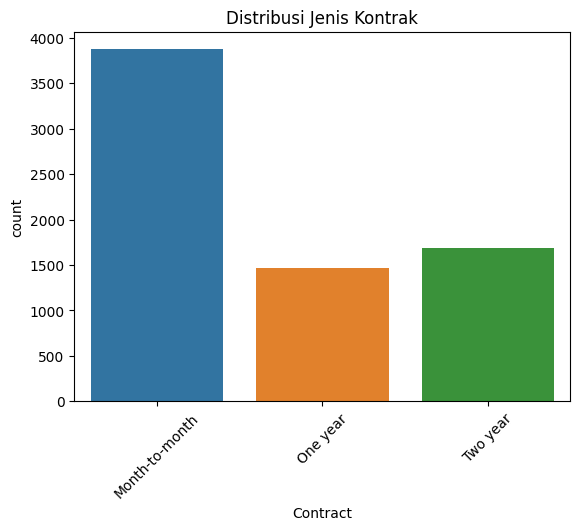

In [12]:
# 4. Proporsi Jenis Kontrak
sns.countplot(x='Contract', data=df)
plt.title("Distribusi Jenis Kontrak")
plt.xticks(rotation=45)
plt.show()


## 🌐 Proporsi Jenis Layanan Internet

Visualisasi ini menampilkan distribusi pelanggan berdasarkan tipe layanan internet yang mereka gunakan, yaitu:

- `DSL`
- `Fiber optic`
- `No Internet` (setelah dilakukan relabel terhadap kategori `No`)

Dengan menggunakan `countplot`, kita dapat melihat proporsi dominan dari masing-masing jenis layanan, yang penting untuk:

- Mengidentifikasi apakah jenis layanan tertentu memiliki korelasi dengan tingkat churn
- Memahami preferensi pelanggan terhadap jenis konektivitas yang tersedia

📌 Relabel kategori `No` menjadi `No Internet` bertujuan untuk memperjelas interpretasi visualisasi dan memperkuat konteks analisis.


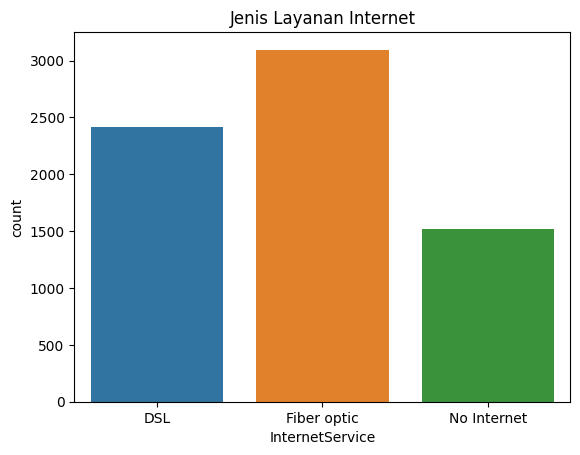

In [13]:
# 5. Proporsi Layanan Internet
# Ganti label sebelum plotting
df['InternetService'] = df['InternetService'].replace({'No': 'No Internet'})

# Plot langsung setelah label diperbarui
sns.countplot(x='InternetService', data=df)
plt.title("Jenis Layanan Internet")
plt.show()



## 🎯 Distribusi Target: Churn

Visualisasi ini menampilkan proporsi pelanggan dalam dua kategori `Churn`:  
- `Yes`: pelanggan yang berhenti berlangganan  
- `No`: pelanggan yang tetap menggunakan layanan

Sebelum visualisasi, label biner 0 dan 1 dikonversi ke label teks agar interpretasi hasil lebih jelas secara bisnis dan presentasi.

📊 Tujuan dari visualisasi ini:
- Memahami distribusi kelas target sebagai langkah awal analisis klasifikasi
- Mengidentifikasi apakah data target bersifat seimbang atau tidak  
- Menentukan kebutuhan teknik penyeimbangan seperti SMOTE pada tahap modeling

📌 Insight awal: jika kelas `Yes` (churn) jauh lebih sedikit dibandingkan `No`, maka dataset termasuk dalam kategori *imbalanced classification problem*.


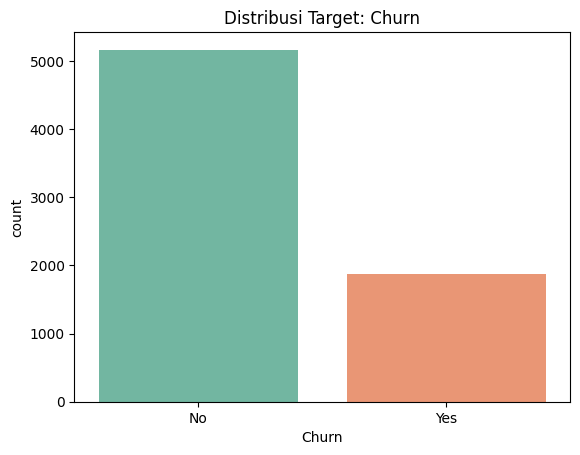

In [14]:
# 🎯 Distribusi Target: Churn
# 6. Analisis Proporsi Churn
# Ganti label 0/1 menjadi No/Yes
df['Churn'] = df['Churn'].replace({0: 'No', 1: 'Yes'})

# Visualisasi proporsi churn
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Distribusi Target: Churn")
plt.show()


## 📊 Proporsi Churn dalam Persentase

Tahapan ini menghitung distribusi kelas target `Churn` dalam bentuk persentase agar mudah dianalisis secara bisnis.

- Label target yang awalnya berupa angka (0/1) diubah menjadi label teks `No` dan `Yes` untuk memperjelas interpretasi.
- Menggunakan `value_counts(normalize=True) * 100` untuk menghasilkan proporsi pelanggan yang churn dan yang tidak.
- Visualisasi atau angka persentase ini membantu memahami tingkat churn secara keseluruhan dan menjadi dasar strategi retensi pelanggan.

📌 *Catatan:* Setelah label diganti, dilakukan kembali statistik deskriptif menggunakan `df.describe(include='all')` untuk melihat apakah perubahan label memengaruhi karakteristik distribusi dan apakah semua fitur sudah siap untuk tahap modeling.


In [15]:
# 7. Proporsi Churn dalam Persentase
# Ganti label churn ke Yes/No
df['Churn'] = df['Churn'].replace({1: 'Yes', 0: 'No'})

# Hitung proporsi churn
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Proporsi Churn (%):\n", churn_rate)

# Statistik deskriptif (dengan label sudah diganti)
df.describe(include='all')



Proporsi Churn (%):
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.0,7032.000000,7032,7032.000000,7032.000000,7032,7032,7032,...,7032,7032,7032,7032,7032,7032.000000,7032,7032.000000,7032.000000,7032
unique,7032,2,2.0,NaN,2,NaN,NaN,3,3,3,...,3,3,3,3,3,NaN,4,NaN,NaN,2
top,3186-AJIEK,Male,0.0,NaN,No,NaN,NaN,No,Fiber optic,No,...,No,No,No,No,Month-to-month,NaN,Electronic check,NaN,NaN,No
freq,1,3549,5890.0,NaN,4933,NaN,NaN,3385,3096,3497,...,3094,3472,2809,2781,3875,NaN,2365,NaN,NaN,5163
mean,NaN,NaN,NaN,0.482509,NaN,32.421786,0.903299,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.592719,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,NaN,0.499729,NaN,24.545260,0.295571,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491363,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,9.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,29.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,NaN,1.000000,NaN,55.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.862500,3794.737500,NaN


# Multivariate Analysis

## 🔗 Korelasi Antar Fitur Numerik

Visualisasi ini menampilkan *matriks korelasi* antar fitur numerik dalam dataset menggunakan heatmap. Korelasi dihitung menggunakan koefisien Pearson dan divisualisasikan dengan tingkat warna dari biru ke merah (`coolwarm`) sebagai indikator kekuatan hubungan.

📌 Tujuan analisis korelasi:

- Mengidentifikasi fitur-fitur yang memiliki hubungan linear yang kuat, baik positif maupun negatif.
- Menentukan apakah terdapat fitur yang redundant dan bisa dipertimbangkan untuk penghapusan atau regularisasi.
- Menilai korelasi terhadap target (jika target numerik), atau fitur numerik yang relevan terhadap label `Churn`.

🔍 Catatan teknis:
- Fitur numerik dipilih otomatis dengan `select_dtypes(include='number')`.
- Heatmap menyajikan korelasi dalam format desimal dua digit (`fmt=".2f"`) agar mudah dibaca dan dibandingkan.

Visual ini sangat berguna sebelum melakukan feature selection, scaling, atau regularisasi pada model.


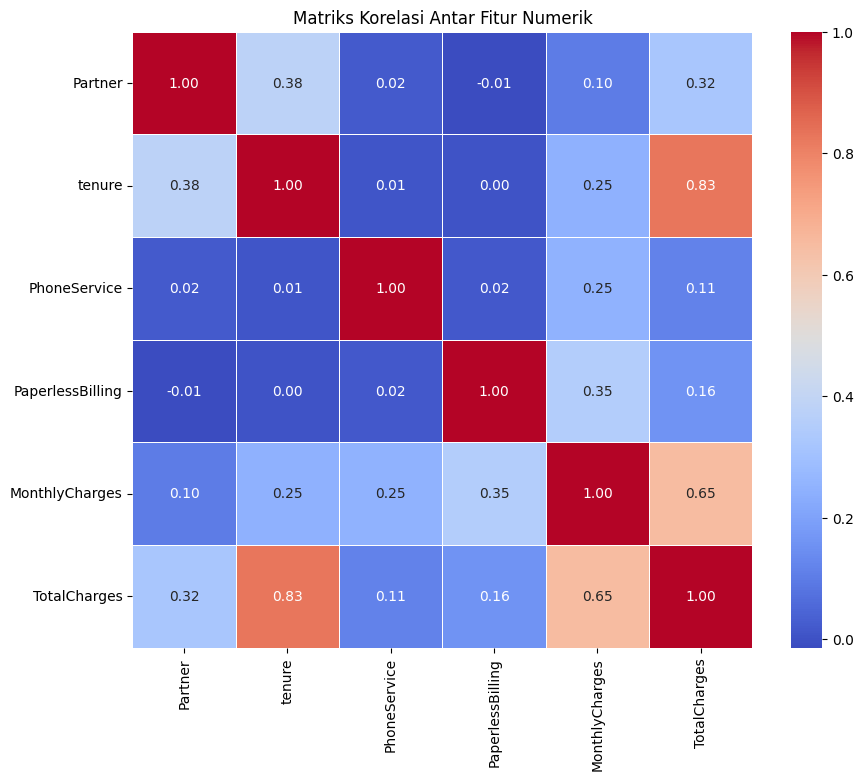

In [16]:
# 7.1 Korelasi antar fitur numerik
# Korelasi numerik
numerik = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numerik.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Fitur Numerik")
plt.show()



## 📈 Pemeriksaan Outlier
Visualisasi sebaran fitur seperti `MonthlyCharges` dan `tenure` menggunakan boxplot.  
Outlier yang terdeteksi akan diperhatikan pada tahap modeling dan preprocessing.


## 📌 Hubungan Fitur Numerik terhadap Target: MonthlyCharges vs Churn

Visualisasi ini menggunakan boxplot untuk menunjukkan distribusi nilai `MonthlyCharges` berdasarkan kelas target `Churn`. Tujuannya adalah:

- Melihat apakah pelanggan yang melakukan churn (`Yes`) cenderung memiliki tagihan bulanan lebih tinggi atau lebih rendah dibanding yang tetap berlangganan (`No`)
- Mengidentifikasi sebaran, median, serta potensi outlier pada masing-masing kelas

📊 Insight Potensial:
- Jika pelanggan churn memiliki tagihan bulanan yang lebih tinggi secara konsisten, maka fitur ini bisa menjadi indikator penting dalam prediksi churn.
- Boxplot juga membantu melihat apakah distribusi antar kelas berbeda secara signifikan.

Visualisasi ini penting dalam mendukung seleksi fitur dan memahami dinamika perilaku pelanggan dari sisi finansial.


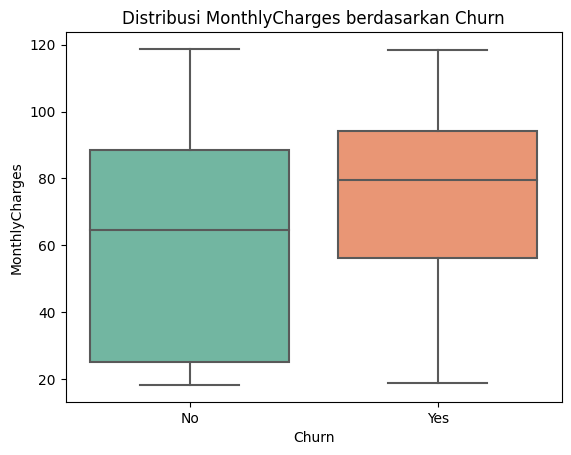

In [17]:
# 📌 7.2 Fitur numerik terhadap target Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title("Distribusi MonthlyCharges berdasarkan Churn")
plt.show()


## 📊 Distribusi Fitur Kategorikal terhadap Target: Contract vs Churn

Visualisasi ini menunjukkan distribusi fitur kategorikal `Contract` berdasarkan kelas target `Churn`. Dengan menggunakan `countplot` dan parameter `hue='Churn'`, kita dapat melihat:

- Proporsi pelanggan churn (`Yes`) dan tidak churn (`No`) pada masing-masing jenis kontrak (`Month-to-month`, `One year`, `Two year`)
- Perbedaan visual yang menonjol dalam kecenderungan churn pada tipe kontrak tertentu

📌 Insight Penting:
- Pelanggan dengan kontrak `Month-to-month` sering kali memiliki tingkat churn yang lebih tinggi dibandingkan jenis kontrak lainnya.
- Kontrak jangka panjang (`One year`, `Two year`) cenderung menunjukkan tingkat retensi yang lebih baik karena komitmen berlangganan yang lebih kuat.

Visual ini membantu mengidentifikasi fitur `Contract` sebagai prediktor potensial dalam pemodelan churn dan merumuskan kebijakan retensi yang lebih tepat sasaran.


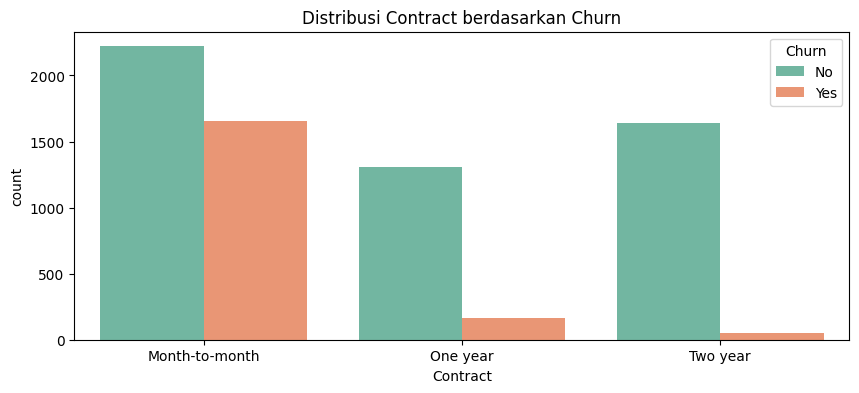

In [18]:
# 7.3 Fitur kategorikal terhadap target Churn
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title("Distribusi Contract berdasarkan Churn")
plt.show()


## 📌 Proporsi Churn Berdasarkan Jenis Kontrak (Percent Stacked Bar)

Visualisasi ini memanfaatkan *crosstab* untuk menghitung persentase pelanggan yang churn (`Yes`) dan tidak churn (`No`) dalam setiap kategori `Contract`.  
Dengan `normalize='index'`, setiap bar menunjukkan distribusi proporsi dalam skala 100%, bukan jumlah absolut.

🔎 Tujuan visualisasi:

- Memberikan pandangan perbandingan churn secara proporsional antar jenis kontrak
- Membantu identifikasi kategori `Contract` yang memiliki tingkat churn tertinggi
- Memperkuat insight bahwa kontrak jangka pendek (`Month-to-month`) berpotensi memiliki risiko churn lebih tinggi dibandingkan kontrak satu atau dua tahun

📌 Visual ini menggunakan *percent stacked bar chart* agar perbandingan antar kategori lebih intuitif dan tidak terpengaruh oleh jumlah pelanggan yang berbeda pada tiap kontrak.


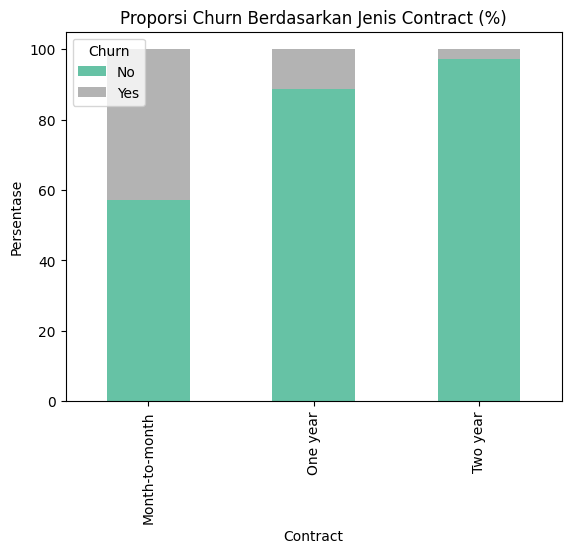

In [19]:
# 📌 7.4 Crosstab & Percent Stacked Bar (opsional tapi informatif!)
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Proporsi Churn Berdasarkan Jenis Contract (%)")
plt.ylabel("Persentase")
plt.show()


## 📤 Train-Test Split & Penanganan Imbalance
Membagi data ke dalam train-test set dengan stratifikasi target `Churn`.  
Mengaplikasikan SMOTE pada data train untuk menyeimbangkan jumlah sampel tiap kelas.


In [20]:
# # 🚀 8. Train-Test Split
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Bagi data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cek distribusi data
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])


Jumlah data training: 5625
Jumlah data testing: 1407


# Modelling

Di tahap ini, model klasifikasi dibangun untuk memprediksi churn. Beberapa algoritma seperti Logistic Regression, Random Forest, dan XGBoost diuji untuk mendapatkan performa terbaik.


## Modeling

**Model yang Dibangun:**

- Logistic Regression
- Random Forest
- XGBoost (model utama)

**Parameter Tuning:**

- GridSearchCV dengan parameter:
  - `n_estimators`: [100, 200]
  - `max_depth`: [3, 6]
  - `learning_rate`: [0.05, 0.1]
  - `subsample`: [0.8, 1.0]
- Validasi: StratifiedKFold (5 fold)
- Skor evaluasi: f1-score

**Improvement:**

- Penambahan `scale_pos_weight` untuk memperkuat perhatian pada kelas churn
- Feature selection dengan SelectFromModel
- Threshold tuning dari 0.5 → 0.4 untuk meningkatkan recall

**Kelebihan XGBoost:**

- Mendukung data imbalance
- Cepat dan akurat
- Dapat digunakan untuk feature importance dan seleksi otomatis

## 🧪 Baseline Modeling
Membangun dua model dasar yaitu Logistic Regression dan Random Forest.  
Tujuan dari baseline modeling adalah memberikan pembanding awal untuk mengevaluasi apakah model lanjutan (seperti XGBoost) memberikan peningkatan performa.  
Model akan dievaluasi berdasarkan f1-score dan recall pada kelas churn.


In [21]:
# Install Libraries

!pip install -U scikit-learn imbalanced-learn xgboost


  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.8 MB/s eta 0:00:0000:01
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.0
    Uninstalling imbalanced-learn-0.10.0:
      Successfully uninstalled imbalanced-learn-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.

## 🔧 One-Hot Encoding untuk Fitur Kategorikal

Tahapan ini bertujuan mengubah fitur-fitur kategorikal dalam `X_train` dan `X_test` menjadi bentuk numerik agar dapat digunakan oleh algoritma machine learning.

- Pertama, fitur kategorikal diidentifikasi otomatis menggunakan `select_dtypes()`, mencakup tipe data `object` dan `category`.
- Dilakukan **One-Hot Encoding** pada kedua dataset (`X_train` dan `X_test`) menggunakan `pd.get_dummies()`:
  - Setiap kategori dalam fitur akan diubah menjadi kolom biner (0/1)
  - Proses encoding dilakukan terpisah untuk data latih dan data uji

📌 Potensi Masalah:
Karena proses encoding dilakukan terpisah, bisa muncul ketidaksesuaian jumlah kolom jika kategori pada train dan test berbeda.

🛠️ Solusi:
- Digunakan `align()` dengan parameter `join='left'` untuk menyelaraskan `X_test_encoded` agar memiliki struktur kolom yang sama dengan `X_train_encoded`.
- Kolom yang tidak ditemukan di `X_test` akan diisi dengan nilai `0`, sehingga model dapat memproses input dengan format yang konsisten.

Langkah ini penting untuk memastikan bahwa pipeline modeling tidak gagal akibat perbedaan struktur data antara fase training dan testing.


In [22]:
# One-Hot Encoding
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


## 🎯 Label Encoding untuk Target `Churn`

Untuk mempersiapkan target variabel `Churn` agar kompatibel dengan algoritma machine learning, dilakukan proses **Label Encoding** menggunakan `LabelEncoder` dari scikit-learn.

Langkah-langkah:
- `fit_transform()` digunakan pada `y_train` agar encoder mempelajari representasi label (misalnya: `No` → 0, `Yes` → 1).
- `transform()` diterapkan pada `y_test` dengan encoder yang sama untuk menjaga konsistensi label antar data latih dan data uji.

📌 Penting:
- Label Encoding cocok digunakan untuk target biner karena menjaga format sederhana dan efisien.
- Encoding ini harus dilakukan setelah proses split data agar informasi dari test set tidak “bocor” ke proses pelatihan model.

Hasil dari encoding disimpan pada variabel `y_train_encoded` dan `y_test_encoded`, dan akan digunakan dalam proses training dan evaluasi model selanjutnya.


In [23]:
# Label Encode Target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


## ⚖️ Feature Scaling & Penanganan Imbalance dengan SMOTE

Tahapan ini bertujuan untuk:

1. **Normalisasi Fitur Numerik**  
   Dengan menggunakan `StandardScaler`, fitur numerik pada dataset `X_train_encoded` dan `X_test_encoded` dinormalisasi agar memiliki distribusi dengan mean 0 dan standard deviation 1.  
   Ini penting karena banyak algoritma machine learning (termasuk Logistic Regression, SVM, dan XGBoost) sensitif terhadap skala fitur.

   - `fit_transform()` digunakan pada data latih untuk menentukan parameter scaling.
   - `transform()` diterapkan pada data uji agar mengikuti skala yang sama.

2. **Menyeimbangkan Distribusi Target dengan SMOTE**  
   Karena kelas `Churn` bersifat *imbalanced*, dilakukan Synthetic Minority Over-sampling Technique (**SMOTE**) untuk:
   - Menambahkan sampel sintetis pada kelas minoritas (`Churn = Yes`)
   - Meningkatkan representasi kelas target agar model tidak bias pada kelas mayoritas

📌 SMOTE bekerja dengan cara membuat data baru berdasarkan interpolasi antara sampel minoritas yang mirip — bukan sekadar duplikasi.

Hasil akhir:
- `X_resampled`, `y_resampled`: data latih yang telah discale dan diseimbangkan
- Siap digunakan untuk pelatihan model klasifikasi yang lebih adil dan akurat


In [24]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.0



  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.10.0-py3-none-any.whl.metadata (8.2 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
Using cached imbalanced_learn-0.10.0-py3-none-any.whl (225 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
mlxtend 0.23.4 req

In [25]:
# Scaling & SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78126e0391c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


## 🚀 Modeling Lanjutan dengan XGBoost
Mengoptimalkan model menggunakan algoritma XGBoost dengan penyesuaian threshold, feature selection dan penanganan imbalance.


In [26]:
# Feature Selection
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb

selector_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
selector_model.fit(X_resampled, y_resampled)

selector = SelectFromModel(selector_model, prefit=True)
X_selected = selector.transform(X_resampled)
X_test_selected = selector.transform(X_test_scaled)


## 🔧 Hyperparameter Tuning
Menggunakan `GridSearchCV` untuk mencari kombinasi parameter terbaik dalam model XGBoost agar performa meningkat.


In [27]:
# XGBoost with scale_pos_weight
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import xgboost as xgb

# Hitung scale_pos_weight
scale_weight = len(y_resampled[y_resampled == 0]) / len(y_resampled[y_resampled == 1])

# Inisiasi model tanpa use_label_encoder
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_weight,
    random_state=42
)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# CV strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit model dengan data hasil feature selection
grid.fit(X_selected, y_resampled)
best_model = grid.best_estimator_



Fitting 5 folds for each of 16 candidates, totalling 80 fits


# Evaluasi Model

Hasil evaluasi model meliputi metrik akurasi, precision, recall, dan f1-score. Confusion matrix digunakan untuk melihat distribusi prediksi.


## Evaluation

**Metrik Evaluasi:**

1. **Accuracy**: Proporsi prediksi benar dari seluruh data
2. **Precision**: Akurasi prediksi churn
3. **Recall**: Kemampuan model menangkap churn aktual
4. **F1-Score**: Harmoni antara precision dan recall
5. **Confusion Matrix**: Visual distribusi TP, FP, FN, TN

**Hasil Evaluasi Model Final:**
Accuracy: 0.7761
precision recall f1-score support No 0.86 0.83 0.84 1033 Yes 0.57 0.64 0.60 374


**Interpretasi:**

- Recall kelas “Yes” sebesar 64% menunjukkan model berhasil mengenali sebagian besar pelanggan churn.
- F1-score kelas “Yes” sebesar 0.60 menunjukkan keseimbangan antara recall dan precision.
- Confusion matrix menunjukkan distribusi prediksi yang cukup seimbang.

              precision    recall  f1-score   support

          No       0.88      0.78      0.83      1033
         Yes       0.54      0.71      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407



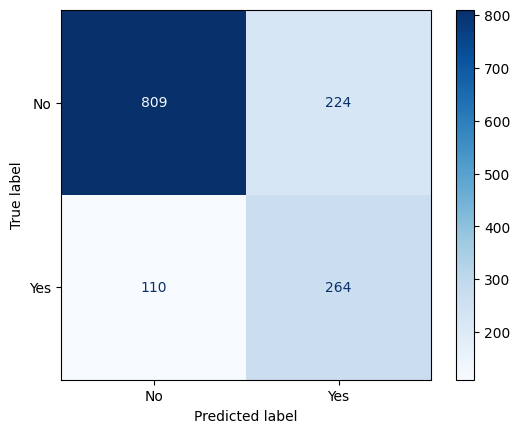

In [28]:
# Evaluasi Akhir dengan Threshold Tuning
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_probs = best_model.predict_proba(X_test_selected)[:, 1]
threshold = 0.4  # disesuaikan untuk maksimalkan recall Yes
y_pred_custom = (y_probs > threshold).astype(int)

print(classification_report(y_test_encoded, y_pred_custom, target_names=le.classes_))

cm = confusion_matrix(y_test_encoded, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')

## 🎯 Akurasi Model Final (Setelah Threshold Tuning)

Setelah dilakukan penyesuaian threshold probabilistik pada model klasifikasi, evaluasi akurasi dilakukan untuk mengukur seberapa tepat model dalam mengklasifikasikan sampel data uji ke kelas yang benar.

📌 Langkah-langkah:
- Menggunakan `accuracy_score()` dari `sklearn.metrics` untuk membandingkan prediksi (`y_pred_custom`) hasil threshold tuning dengan label sebenarnya (`y_test_encoded`)
- Menampilkan skor akurasi akhir dalam format desimal empat digit untuk presisi evaluasi

📊 Akurasi ini memberikan gambaran umum tentang kinerja model, meskipun pada kasus data imbalance seperti prediksi churn, metrik seperti **f1-score** dan **recall pada kelas minoritas** juga perlu diperhatikan untuk evaluasi yang lebih menyeluruh.


In [29]:
# akurasi spesifik dari model final (setelah threshold tuning)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_encoded, y_pred_custom)
print("🎯 Akurasi Model Akhir:", round(accuracy, 4))


🎯 Akurasi Model Akhir: 0.7626


## 📈 ROC Curve – XGBoost Model

ROC (Receiver Operating Characteristic) Curve digunakan untuk menilai kinerja model klasifikasi berdasarkan kemampuan membedakan kelas positif dan negatif. Kurva ini memplot **True Positive Rate (TPR)** terhadap **False Positive Rate (FPR)** untuk berbagai nilai threshold probabilitas.

🔍 Langkah-langkah:
- Gunakan `roc_curve()` untuk menghasilkan nilai FPR, TPR, dan threshold berdasarkan probabilitas prediksi (`y_probs`) terhadap label asli (`y_test_encoded`)
- Hitung **AUC (Area Under Curve)** dengan `roc_auc_score()` untuk menilai seberapa baik model membedakan kelas
- Visualisasi kurva ROC dengan matplotlib, lengkap dengan diagonal baseline sebagai pembanding acak

🎯 Hasil:
- AUC score ditampilkan dalam legenda kurva dengan 2 digit desimal presisi, contoh: `AUC = 0.87`
- AUC di atas 0.80 umumnya menunjukkan kinerja model yang baik dalam klasifikasi binari

📌 Catatan:
Untuk kasus prediksi churn, ROC dan AUC membantu memahami trade-off antara sensitivitas dan spesifisitas, terutama saat mempertimbangkan threshold tuning.




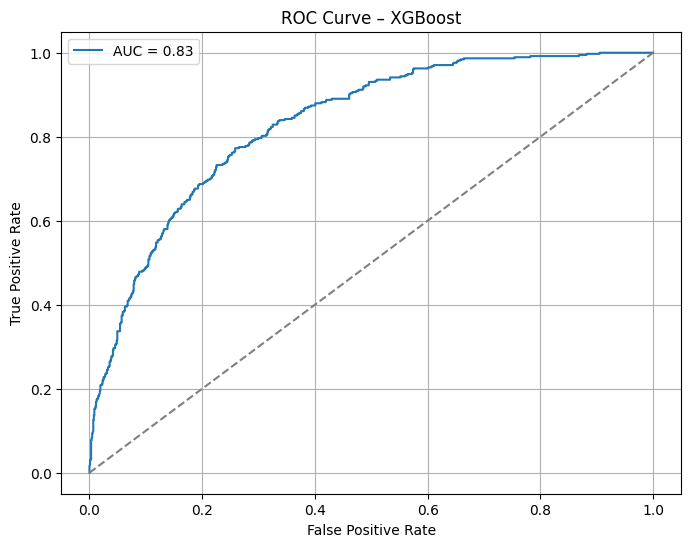

In [30]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs)
auc_score = roc_auc_score(y_test_encoded, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost")
plt.legend()
plt.grid()
plt.show()


## 🔍 Threshold Exploration – F1-Score vs Threshold

Eksplorasi threshold sangat penting untuk menemukan ambang probabilitas terbaik yang memaksimalkan kinerja model dalam klasifikasi binari, terutama saat menangani data imbalance seperti churn.

📌 Langkah-langkah:
- `np.arange(0.3, 0.6, 0.01)`: menghasilkan rentang threshold dari 0.30 hingga 0.59 dengan interval 0.01
- Untuk setiap threshold, prediksi biner dibuat berdasarkan apakah `y_probs` lebih besar dari threshold tersebut
- Hitung skor **F1** menggunakan `f1_score()` untuk menyeimbangkan **presisi** dan **recall**
- Visualisasi hasil dengan plot garis yang menunjukkan hubungan antara threshold dan skor F1

📊 Tujuan Analisis:
- Mengidentifikasi **threshold optimal** yang memberi F1-score tertinggi
- Menyediakan wawasan untuk **threshold tuning**, yang lebih informatif dibanding hanya melihat akurasi


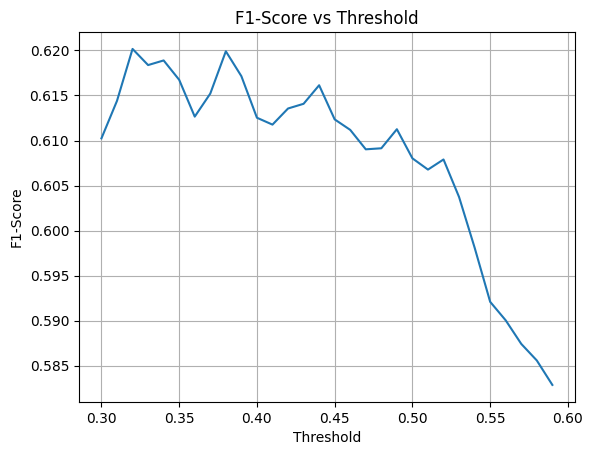

In [31]:
# Threshold Exploration
import numpy as np
from sklearn.metrics import f1_score
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

thresholds = np.arange(0.3, 0.6, 0.01)
f1_scores = [f1_score(y_test_encoded, (y_probs > thr).astype(int)) for thr in thresholds]

plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1-Score")
plt.title("F1-Score vs Threshold")
plt.grid()
plt.show()
